In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import os
import glob
import sys
sys.path.append("..")
from body_parts_measurement_data_generator import BodyPartsMeasurementDataGenerator

In [2]:
config = {
    # model
    'input_shape': [256,256,3],     # 훈련 이미지 크기
    'batch_size': 4,                # 배치 사이즈
    'path_pretrained': None,        # pretrained 모델 경로
    'type_backbone': "blazepose",   # backbone type (blazepose, mobilenet_v3)
    
    # loss
    'type_loss_fn': 'wing',         # 손실 함수 설정 (wing, mae)
    
    # data
    'seg_shape': [64,64],           # segmentation 크기 *미사용
    'path_classes': "../seg_classes.txt",   # segmentation class 정보 *미사용
    'shuffle': True,                # 데이터 섞기
    'is_normalized': False,         # normalize 데이터
    'is_with_seg': False,           # segmentation 사용 여부 *미사용
    'path_dataset': r"C:\AI_class_yang\sample_data_2", # 데이터 경로
    ## attention type              
    'type_attention': "regression", # attention 종류 (regression, categorical, none)
    'num_category_bmi': 10,         # categorical 시의 bmi category 갯수 변수
    'num_category_height': 10,      # categorical 시의 height category 갯수 변수
	'has_filename': False,
    # train
    'epochs': 30,                   # 훈련 epoch 수
    'eval_term': 1                  # 평가 빈도
}

In [3]:
data_generator = BodyPartsMeasurementDataGenerator(config, data_type="train")

list_user_dirs ['F001', 'F002', 'F003', 'M001', 'M002', 'M003']


In [4]:
print(data_generator.min_body_parts_measurement, data_generator.min_body_parts_measurement.shape)
print(data_generator.max_body_parts_measurement, data_generator.max_body_parts_measurement.shape)

[161.4     136.1      80.1     119.8      94.2      73.2      41.6
  52.       30.5      84.5      74.4      79.6      88.2      51.3
  32.9      34.4      18.9      23.2      26.3      21.       13.6
  30.1      52.1      35.4      19.2       9.7      22.4       9.2
  11.2      16.        9.2       7.       53.2      20.9       0.
  26.       19.85306] (37,)
[177.2     148.4      85.      131.6     107.       77.5      47.5
  59.6      39.9      97.4      93.6      95.3      99.4      62.3
  39.1      38.       23.1      27.6      34.2      27.       17.8
  32.4      58.9      42.7      24.1      12.7      26.4      11.1
  15.       19.4      11.1       8.6      79.3      32.8       1.
  51.       25.77591] (37,)


In [5]:
for idx in range(10) :
    data = data_generator.__getitem__(idx)
    print(data[1])

[[140.4  84.7 123.3 107.   77.3  45.2  54.7  31.8  88.5  74.4  81.5  92.
   51.3  36.   35.5  20.1  24.2  26.5  22.7  13.6  30.8  54.6  35.4  22.1
   10.8  24.5   9.3  13.   17.    9.2   7. ]
 [138.2  81.9 120.6  97.1  74.8  42.3  52.   30.5  84.5  76.5  79.6  88.2
   52.8  32.9  34.4  18.9  23.2  26.3  21.   14.2  30.6  52.5  35.4  19.2
    9.7  22.4   9.2  11.2  16.9   9.7   7.6]
 [138.2  81.9 120.6  97.1  74.8  42.3  52.   30.5  84.5  76.5  79.6  88.2
   52.8  32.9  34.4  18.9  23.2  26.3  21.   14.2  30.6  52.5  35.4  19.2
    9.7  22.4   9.2  11.2  16.9   9.7   7.6]
 [138.2  81.9 120.6  97.1  74.8  42.3  52.   30.5  84.5  76.5  79.6  88.2
   52.8  32.9  34.4  18.9  23.2  26.3  21.   14.2  30.6  52.5  35.4  19.2
    9.7  22.4   9.2  11.2  16.9   9.7   7.6]]
[[136.1  80.1 119.8  94.2  73.2  41.6  55.5  35.2  90.6  80.5  83.4  98.6
   58.4  38.   38.   21.3  25.   29.3  24.   16.7  30.1  52.1  35.4  21.2
   10.4  22.9   9.9  12.9  16.    9.2   7.8]
 [146.8  82.6 129.2 102.6  74.6  44

In [6]:
data = data_generator.__getitem__(2)

In [7]:
img = data[0].astype(np.int32)

In [8]:
np.amax(data[0])

255.0

In [9]:
data[1].shape

(4, 31)

In [10]:
data[1]

array([[147.1,  85. , 128.5, 104.6,  75.4,  47.5,  59. ,  39.9,  94.9,
         93.6,  95.3,  96.7,  59.3,  38.9,  37.6,  22.6,  27.6,  32.1,
         26.6,  17.8,  32.4,  56.4,  40.9,  24.1,  12.7,  26.4,  10.2,
         14.1,  19.4,  11.1,   8.6],
       [140.4,  84.7, 123.3, 107. ,  77.3,  45.2,  54.7,  31.8,  88.5,
         74.4,  81.5,  92. ,  51.3,  36. ,  35.5,  20.1,  24.2,  26.5,
         22.7,  13.6,  30.8,  54.6,  35.4,  22.1,  10.8,  24.5,   9.3,
         13. ,  17. ,   9.2,   7. ],
       [136.1,  80.1, 119.8,  94.2,  73.2,  41.6,  55.5,  35.2,  90.6,
         80.5,  83.4,  98.6,  58.4,  38. ,  38. ,  21.3,  25. ,  29.3,
         24. ,  16.7,  30.1,  52.1,  35.4,  21.2,  10.4,  22.9,   9.9,
         12.9,  16. ,   9.2,   7.8],
       [148.4,  83.6, 131.6, 104.3,  77.5,  46.6,  57.6,  36.7,  90.6,
         85.1,  84.8,  98.2,  58.8,  39.1,  37.1,  21.3,  25.4,  31.9,
         25.8,  16.6,  32.2,  58.9,  42. ,  21.7,  11.1,  24.8,  11.1,
         13.4,  17.8,  10.1,   8.6]],

In [11]:
print(np.amax(data[1]))

148.4


In [12]:
data[2][0,:,:,0].shape

IndexError: too many indices for array: array is 2-dimensional, but 4 were indexed

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


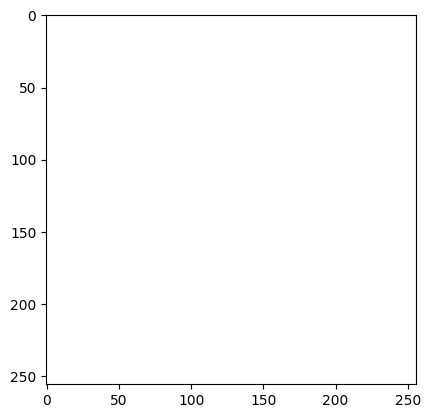

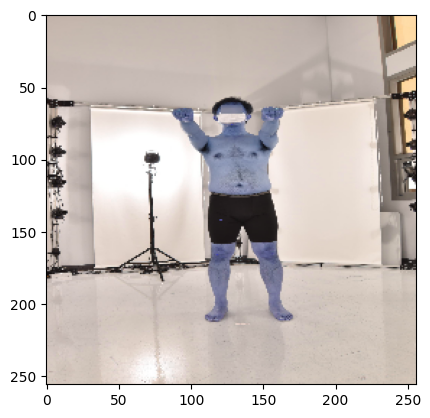

IndexError: too many indices for array: array is 2-dimensional, but 4 were indexed

In [13]:
plt.imshow(data[0][0,:,:,:])
plt.show()

plt.imshow(img[0,:,:,:])
plt.show()

plt.imshow(data[2][0,:,:,0])
plt.show()

In [ ]:
np.amax(data[2][:,:,3])

In [ ]:
cv2.resize(data, (128,128))

In [ ]:
iter_dg = iter(data_generator)

In [ ]:
data = next(iter_dg)

In [ ]:
data[0].shape

In [ ]:
data[1].shape

In [ ]:
data[1] / data_generator.max_body_parts_measurement

In [ ]:
path_base_dataset_dir = "C:\\Users\\user\\work\\data\\body_parts_measurement"
list_user_dirs = os.listdir(path_base_dataset_dir)
list_user_dirs.sort()
print(len(list_user_dirs))

list_data = []
list_body_parts_measurement = []
list_max_body_parts_measurement = [0] * 36
for user_dir in list_user_dirs :
    path_full_user_dir = path_base_dataset_dir + os.path.sep + user_dir
    ##### get parts measurement
    path_user_csv = path_full_user_dir + os.path.sep + "csv" + os.path.sep + user_dir + ".csv"
    df = pd.read_csv(path_user_csv, encoding = "ISO-8859-1")
    body_parts_measurement = df.iloc[[1]].values[0][3:-1]
    # change gender to digit
    if body_parts_measurement[-2] == "F" : 
        body_parts_measurement[-2] = "1"
    elif body_parts_measurement[-2] == "M" :
        body_parts_measurement[-2] = "0"
    else :
        print("wrong")
    body_parts_measurement = body_parts_measurement.astype(np.float32)
    # get max value for each column for normalization
    for idx, (max_val, measurement) in enumerate(zip(list_max_body_parts_measurement, body_parts_measurement)) :
        if measurement > max_val :
            list_max_body_parts_measurement[idx] = measurement
    ##### get list of images
    path_user_image_dir = path_full_user_dir + os.path.sep + "image"
    # get only images for attention posture
    list_path_images = glob.glob(path_user_image_dir + os.path.sep + "*.jpg")
    for each_path_image in list_path_images :
        each_data = [each_path_image, body_parts_measurement]
        list_data.append(each_data)


In [ ]:
list_max_body_parts_measurement

In [ ]:
import labelme
import imgviz
import json
import codecs
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [ ]:
print("한글")

In [ ]:
file_name = "C:\\Users\\user\\work\\data\\body_parts_measurement\\train\\F001\\json\\01_01_F001_01.json"

In [ ]:
codec_f = codecs.open(file_name, 'r', encoding='euc_kr') 

In [ ]:
data = json.load(codec_f)

In [ ]:
data['labelingInfo'][0]

In [ ]:
coordinates = data['labelingInfo'][0]['polygon']['location'].split(" ")[:-1]

In [ ]:
list_coords = [int(x) for x in coordinates]
contours = np.array(list_coords).reshape(-1,2)

In [ ]:
image = np.zeros((3000,3000))
cv2.fillPoly(image, pts=[contours], color=(255,0,0))
plt.imshow(image)
plt.show()

In [ ]:
data

In [ ]:
import site; print(''.join(site.getsitepackages()))